# **What is Time Series?**
A dataset where each value is associated with a timestamp. In other words, its a sequence of observations recorded at regular intervals of time.

# Why perform analysis of Time Series?
Time series analysis inlcudes understanding various components/characteristics of the series so that one can make informed decisions and provide accurate forecasts.

Before beginning with TSA, lets arm ourselves with some tools

# Load Modules



In [7]:
from dateutil.parser import parse  # makes parsing dates easy

import matplotlib as mpl  # plotting library
import matplotlib.pyplot as plt
import seaborn as sns # library for making statistical graphics in Python. It builds on top of matplotlib

import numpy as np  # vectors and matrices
import pandas as pd # tables and data manipulations
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  #statistics


# Import Time Series Data in Python


In [8]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

date     value
0 1991-07-01  3.526591
1 1991-08-01  3.180891
2 1991-09-01  3.252221
3 1991-10-01  3.611003
4 1991-11-01  3.565869

In [9]:
#Import as Series
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869

# Time for Visualizing Data

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations.

## Importing from google drive

### Mount drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Plot data

#### Example 1


Text(0.5, 1.0, 'Ads watched (hourly data)')

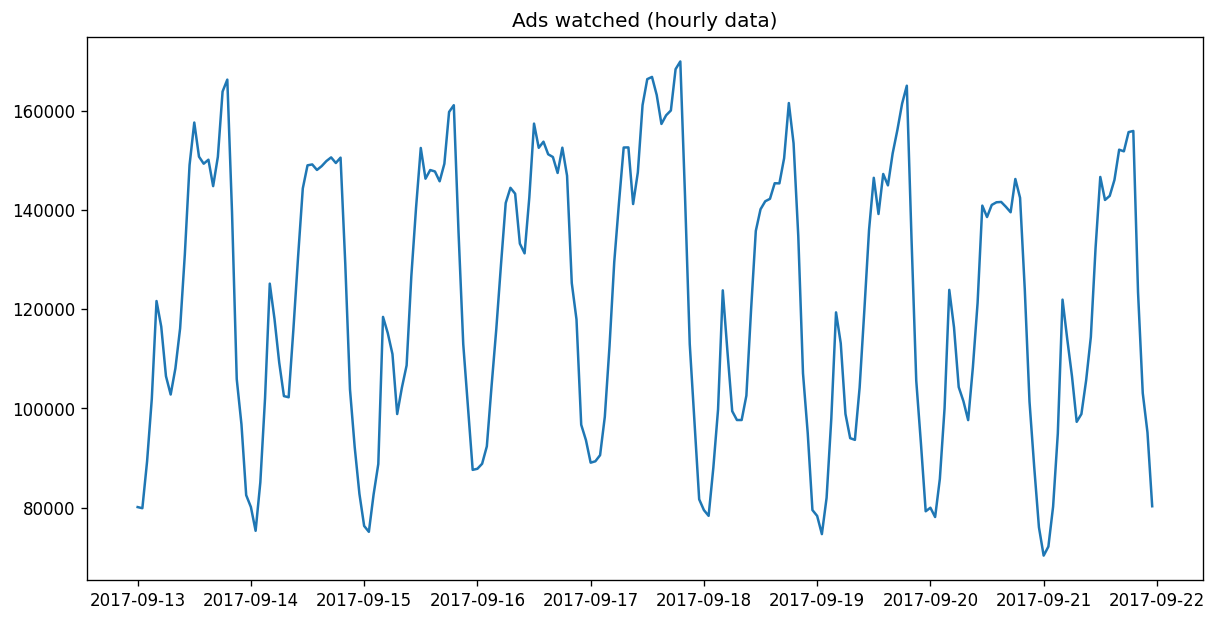

In [11]:
csv_file = 'drive/My Drive/TSA/ads.csv'

ads = pd.read_csv(csv_file, index_col=['Time'], parse_dates=['Time'])
plt.figure(figsize=(12, 6))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')

#### Example 2


In [12]:
passenger_df = pd.read_csv('drive/My Drive/TSA/AirPassengers.csv', header=0, index_col=0, parse_dates=[0])
passenger_df.head()


#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [13]:
passenger_df.rename(columns={ '#Passengers':'passengers'}, inplace=True)
passenger_df.head()

passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

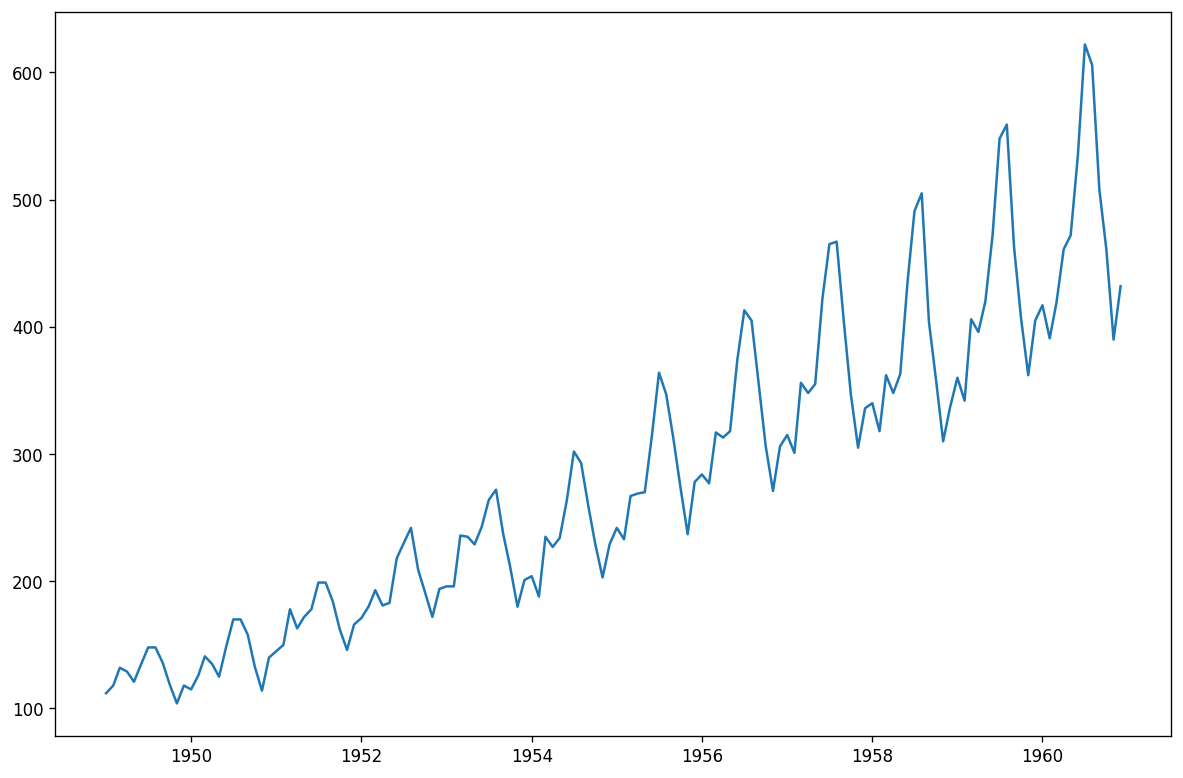

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(passenger_df, label = 'Airline Passangers Data')
plt.show()

#### Example 3

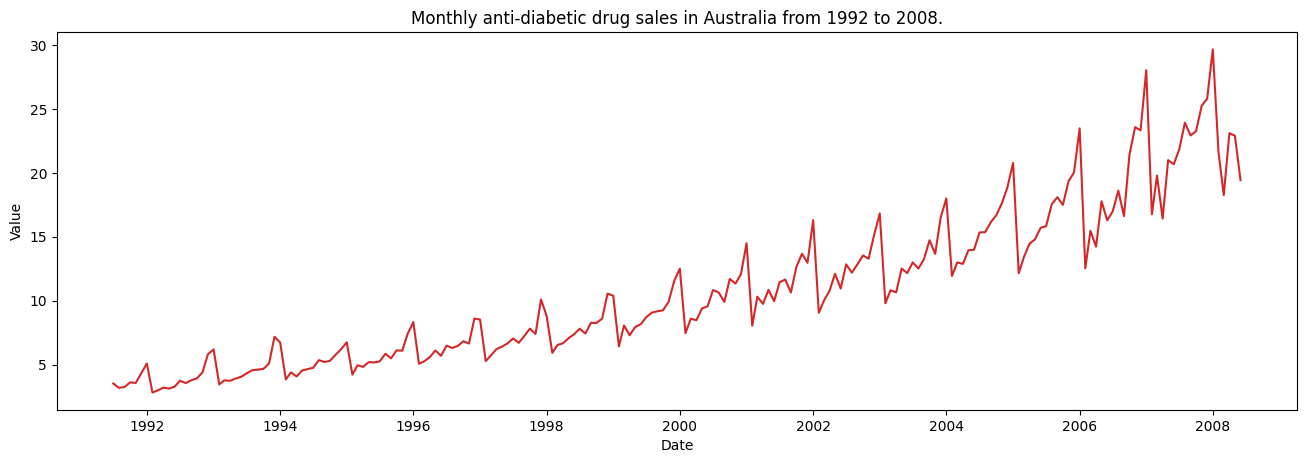

In [15]:
# Time series data source: fpp pacakge in R.
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

#### *Seasonal plot*


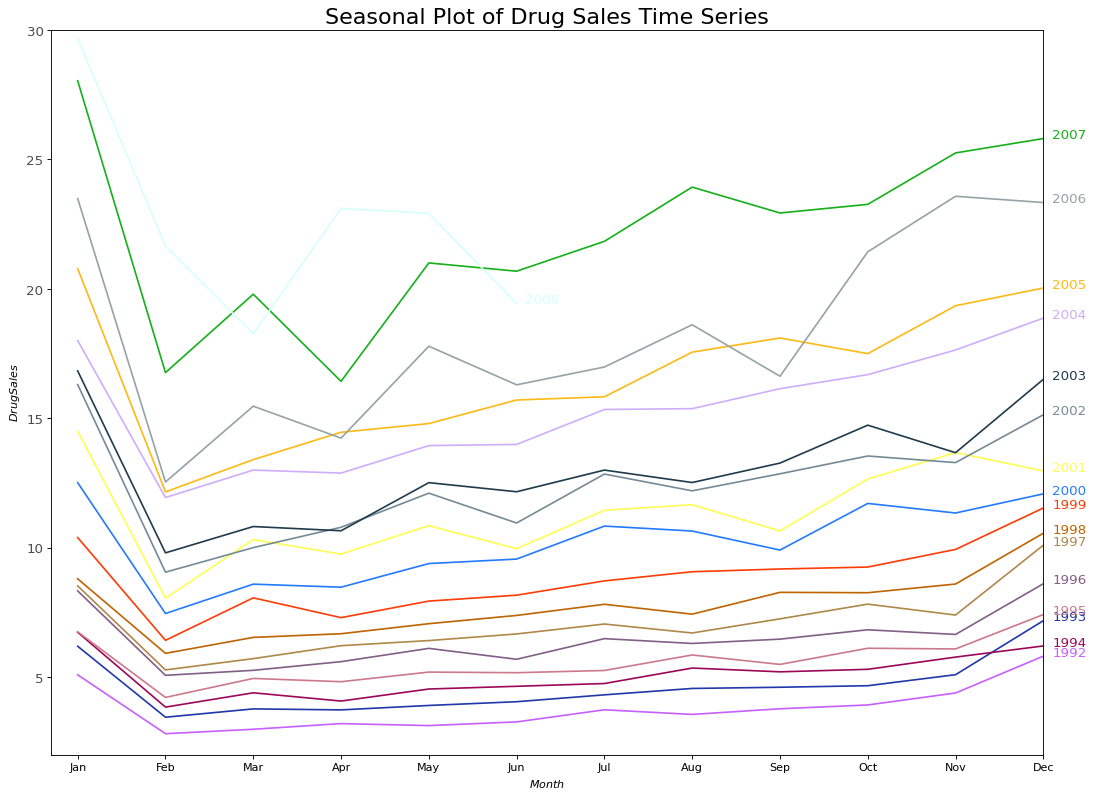

In [16]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

df.month
# Coloring lines randomly
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

#### *Box plot*


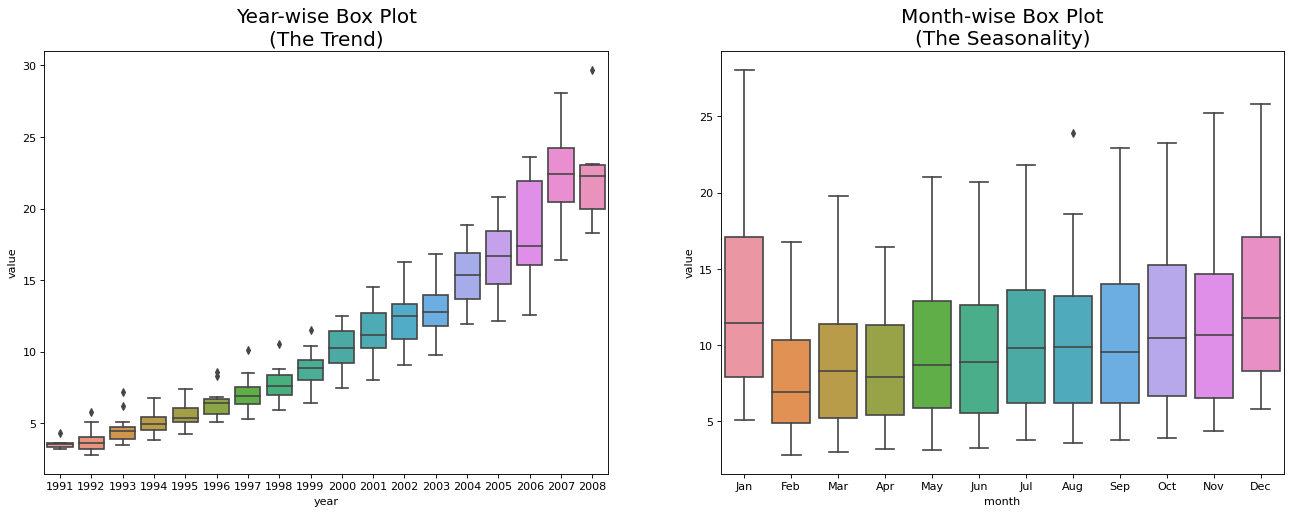

In [17]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Components of Time Series

1.   **Trend** : Increase or decrease in the series of data over a longer period.
2.   **Seasonality** : Present when there is a unique repeated pattern observed between regular intervals due to seasonal factors.
3.   **Error / Remainder** :Residuals left or noise.

Note: Seasonality is always of a fixed and known frequency.

4. **Cyclic**: It is observed when the rises and falls exhibited by data is not in accordance to some fixed / calender based interval. These fluctuations are usually due to economic conditions: “business cycle”. 

Confused between cyclic and seasonlaity?

One good rule of thumb is if the patterns observed are not of fixed frequnecy the series is cyclic; if it changes are associated with some interval / calendar interval then the pattern is seasonal.\
Also, cycles tend to have longer average lengths than a seasonal pattern.
Cyclic patterns typically have more variable magnitudes than seasonal patterns.


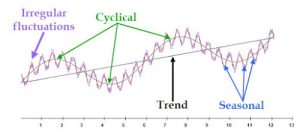

Image source: https://www.fromthegenesis.com/components-of-time-series/

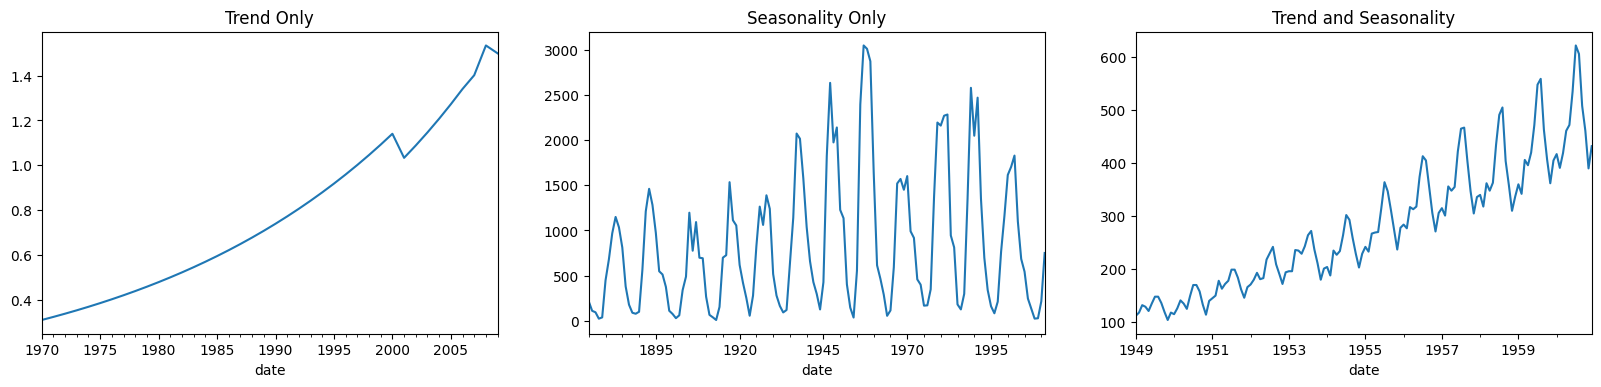

In [18]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])


*What about the next series?*

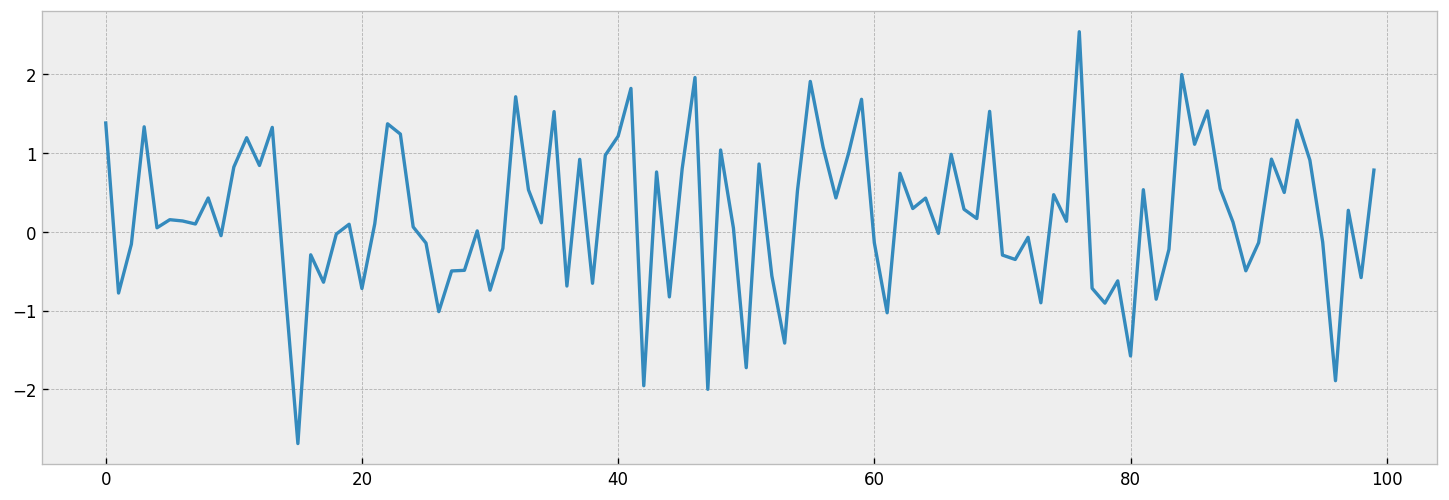

In [19]:
white_noise = np.random.normal(size=100)
with plt.style.context('bmh'): 
    plt.figure(figsize=(15, 5))
    plt.plot(white_noise)

### Additive and Multiplicative Models

Additive Time Series:
Values = Trend + Seasonality + Error



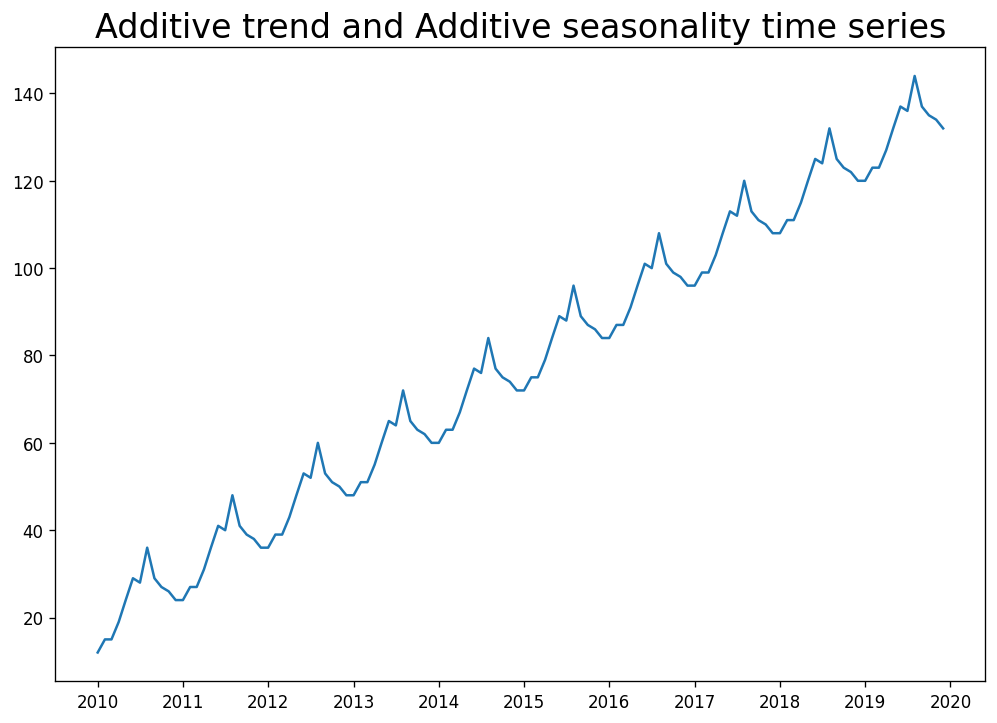

In [20]:
# Terms to be added to single season for seasonality effect
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Add value to seasonal scalar
        time_series.append(val + seasonal_adders[i])

# Convert to DataFrame
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Additive trend and Additive seasonality time series', size=20)
plt.plot(df_aa);


Multiplicative Time Series:
Values = Trend * Seasonality * Error

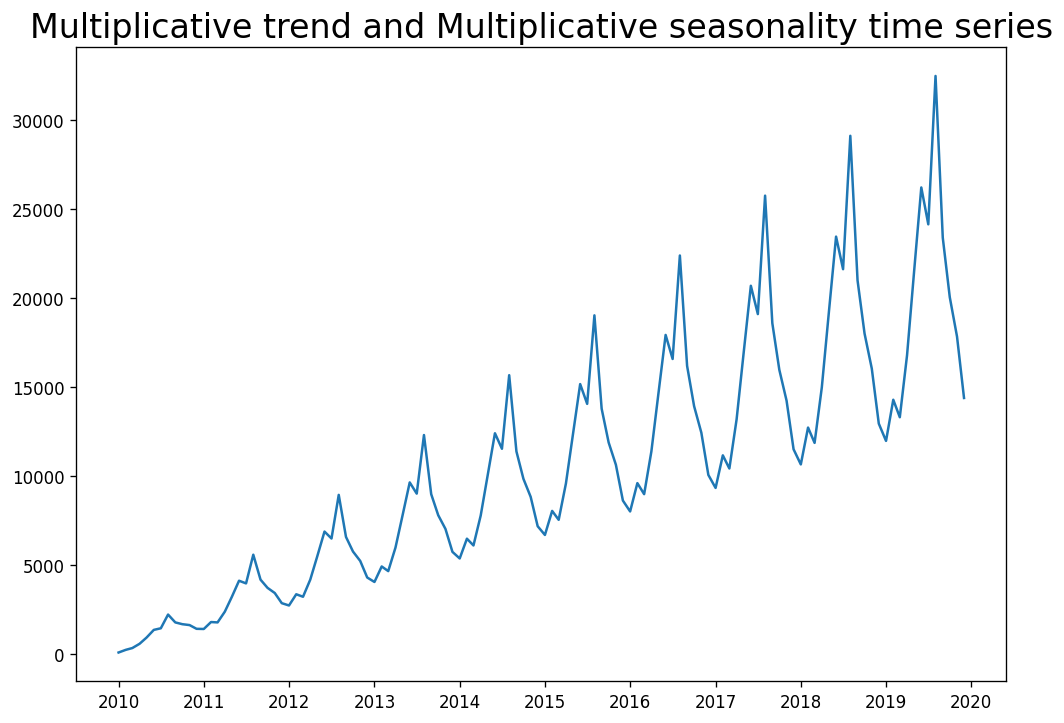

In [21]:
# Single season multiplier factors - for seasonality effect
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])
        
# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

### Decompose a time series 

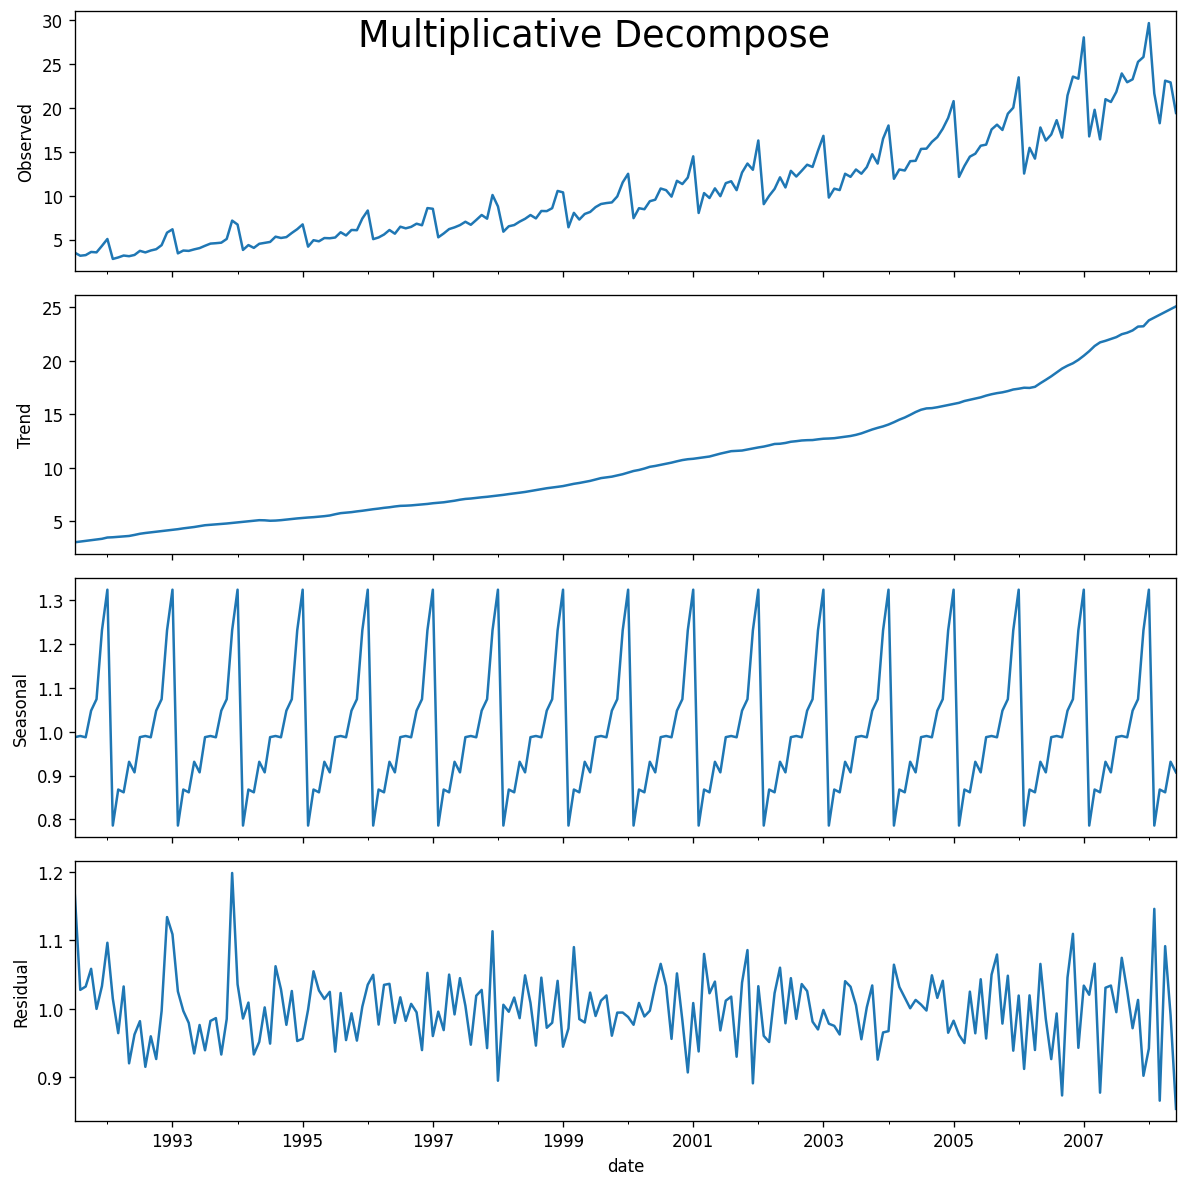

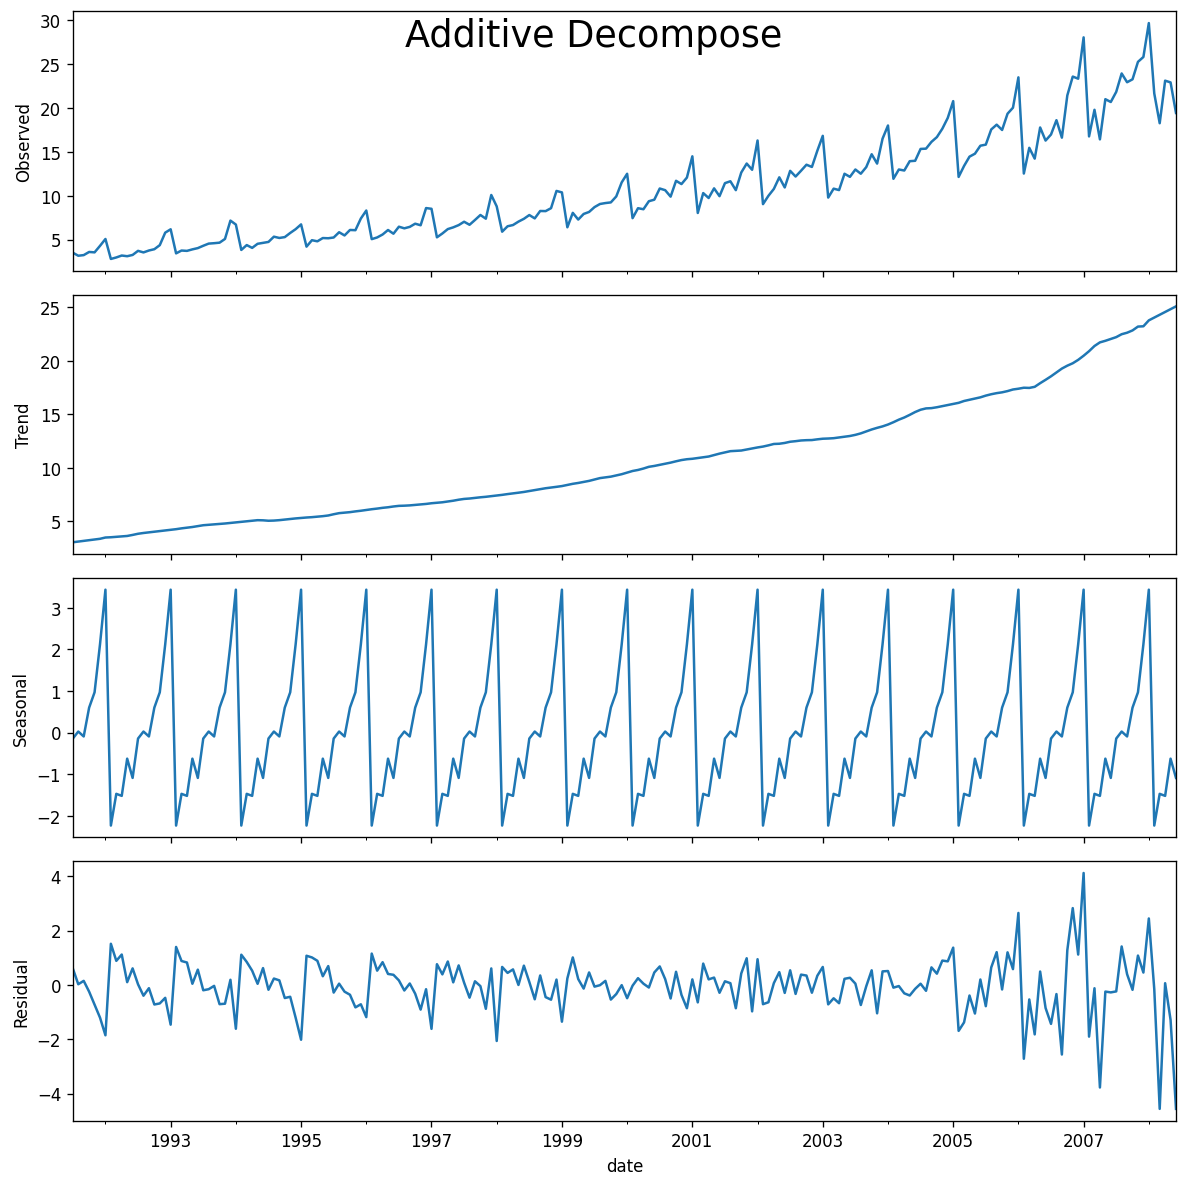

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq') # extrapolate takes care of any missing values in the trend and residuals at the beginning of the series.

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()



### Stationary Time Series

A stationary series is one where the values of the series is not a function of time.

Stationarity properities:

1.   There is no trend i.e mean is constant
2.   Constant Variance over time
3.   No periodic fluctuations i.e Constant autocorrelation  (Correlation of the series with its previous values,)
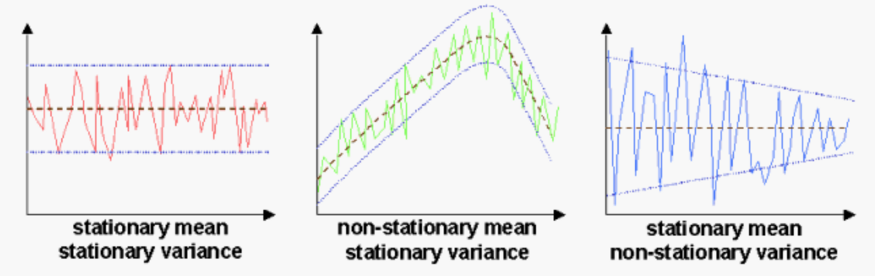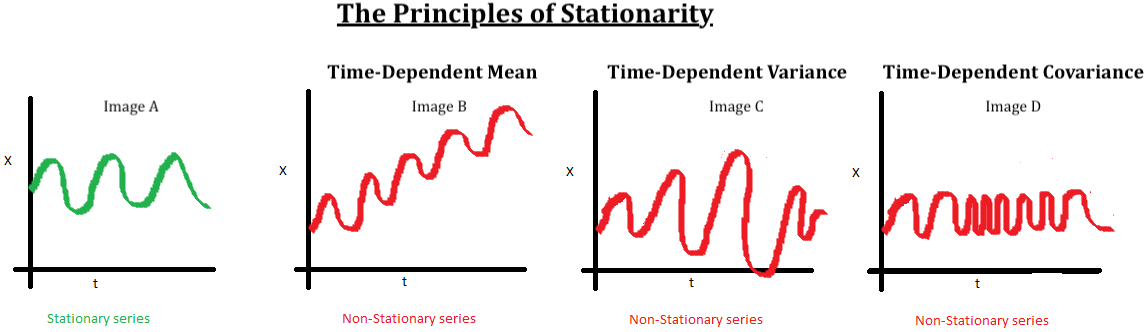

Image source

https://www.linkedin.com/pulse/learning-time-series-stationary-properties-cornellius-yudha-wijaya

https://towardsdatascience.com/achieving-stationarity-with-time-series-data-abd59fd8d5a0


### Why are we learning Stationary Series?

Most Time Series are non-stationary and the models we have, are meant for stationary series. \
Also, it is possible to convert any non-stationary series to stationary series by applying appropriate transformations.


---




### How to make a time series stationary?

1.   Differencing the Series (once or more) : Y'= Y[t] - Y[t-1]
2.   Take the log of the series
3.   Take the nth root of the series
4.   Combination of the above

Example of Differencing:

[1, 7, 16, 20, 23]

[7-1, 16-7, 20-16, 23-20 ] = [ 6 ,9, 4 ,3]

[ 9-6 ,4-9, 3-4 ] = [3, -5, -1]





---




### How to check for stationarity?


**Look at Plots:** 
Plot a run sequence plot to see anything with an obvious trend or seasonal effects

**Summary Statistics:** 
Partition your data into intervals and check for obvious or significant differences in summary statistics

**Statistical Test:**
Use statistical tests if the expectations of stationarity are met or violated  (Unit Root Tests)

Some of them are stated below:
1.   Augmented Dickey Fuller test (ADF Test) : 
2.   Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

  

ADF test:\
Null hypothesis is the time series is non-stationary. \
If the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis.

KPSS test: \
Test for trend stationarity.\
Null hypothesis and the P-Value interpretation is just the opposite of ADF test.

We will only see ADF test:










In [23]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067287
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


### What is the difference between White noise and stationary series?
The only difference is that the mean of white noise is 0.

Each observation is uncorrelated with all the values in the sequence i.e. autocorrelation is close to 0

It is not predictable


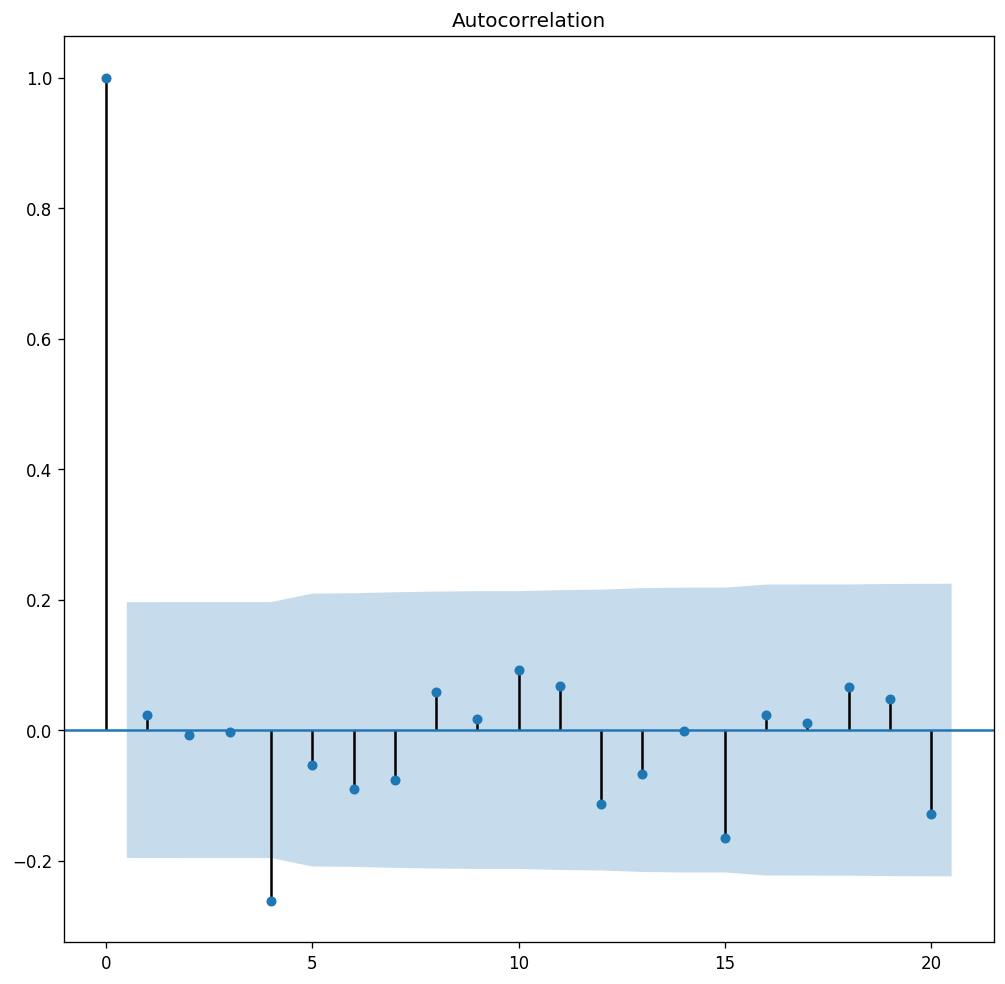

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(white_noise, lags=20);

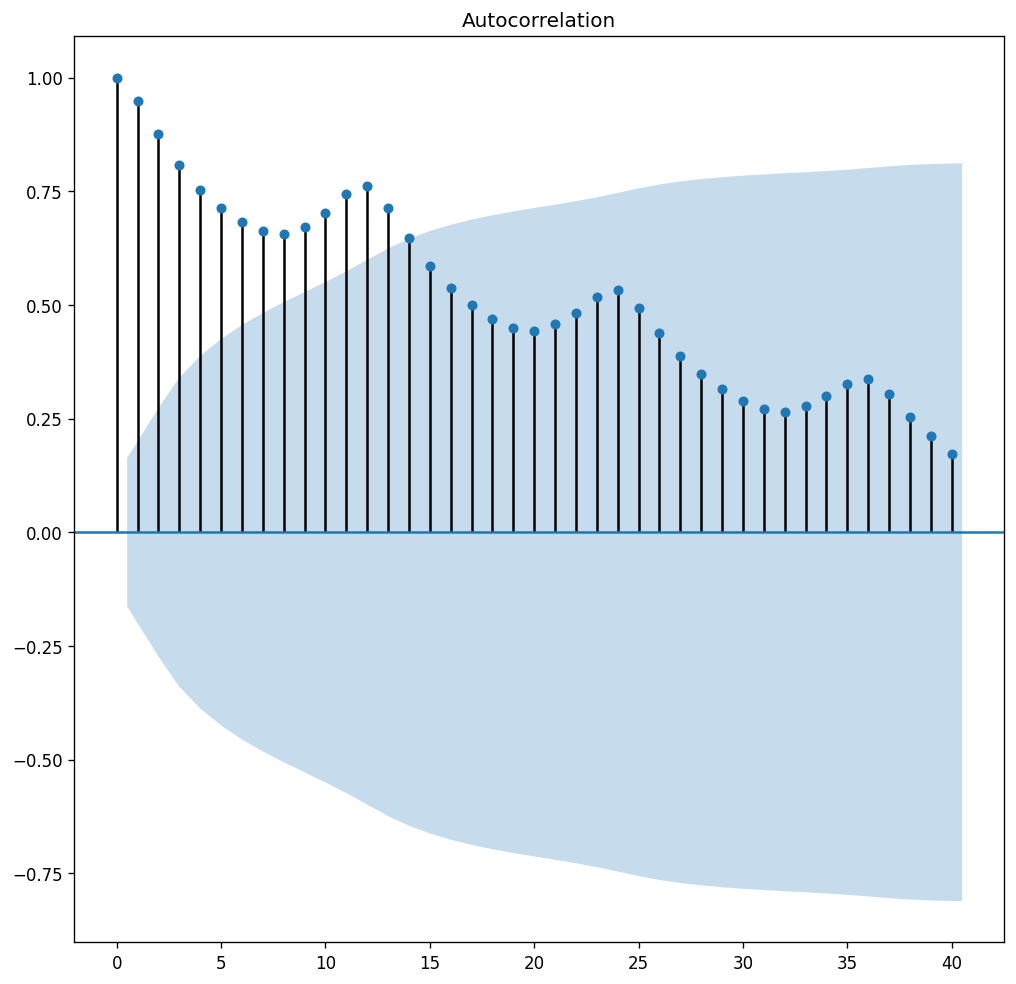

In [25]:
#ACF plot for passenger data
acf_plot = plot_acf(passenger_df.passengers, lags=40)

### What is autocorrelation and partial autocorrelation functions?
Autocorrelation function is essentially the correlation with its own lagged values



Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

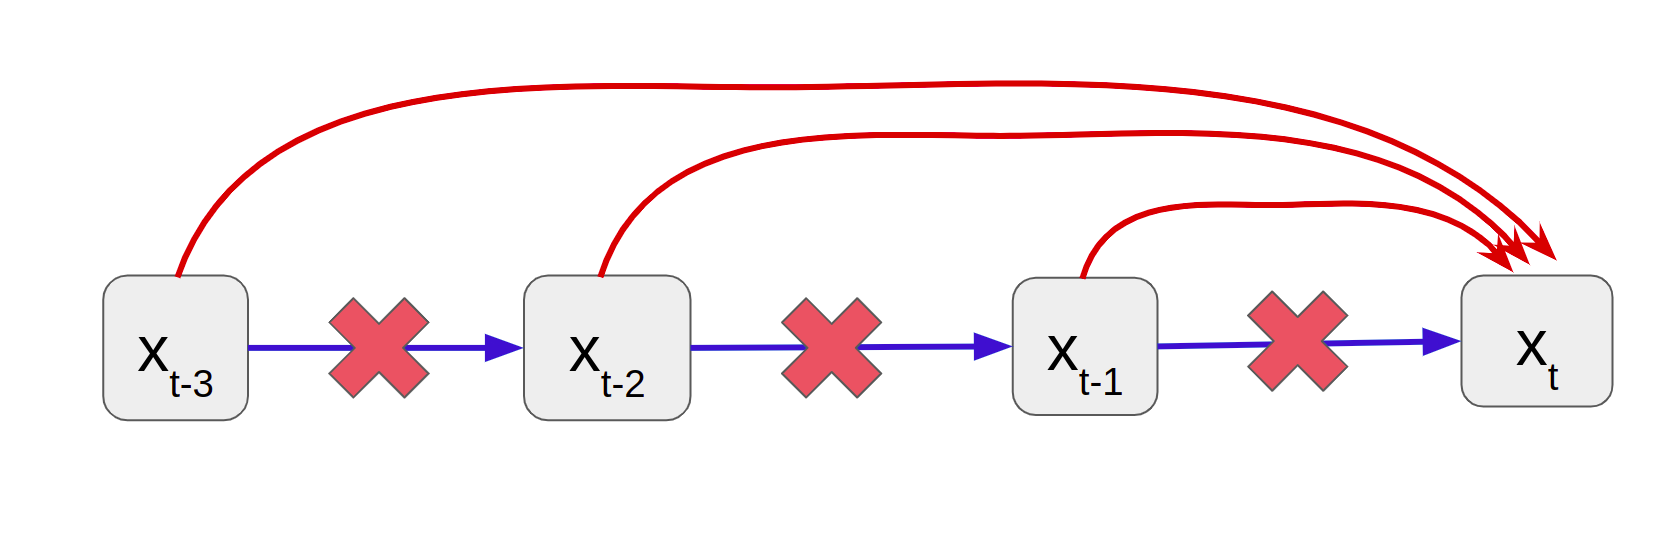

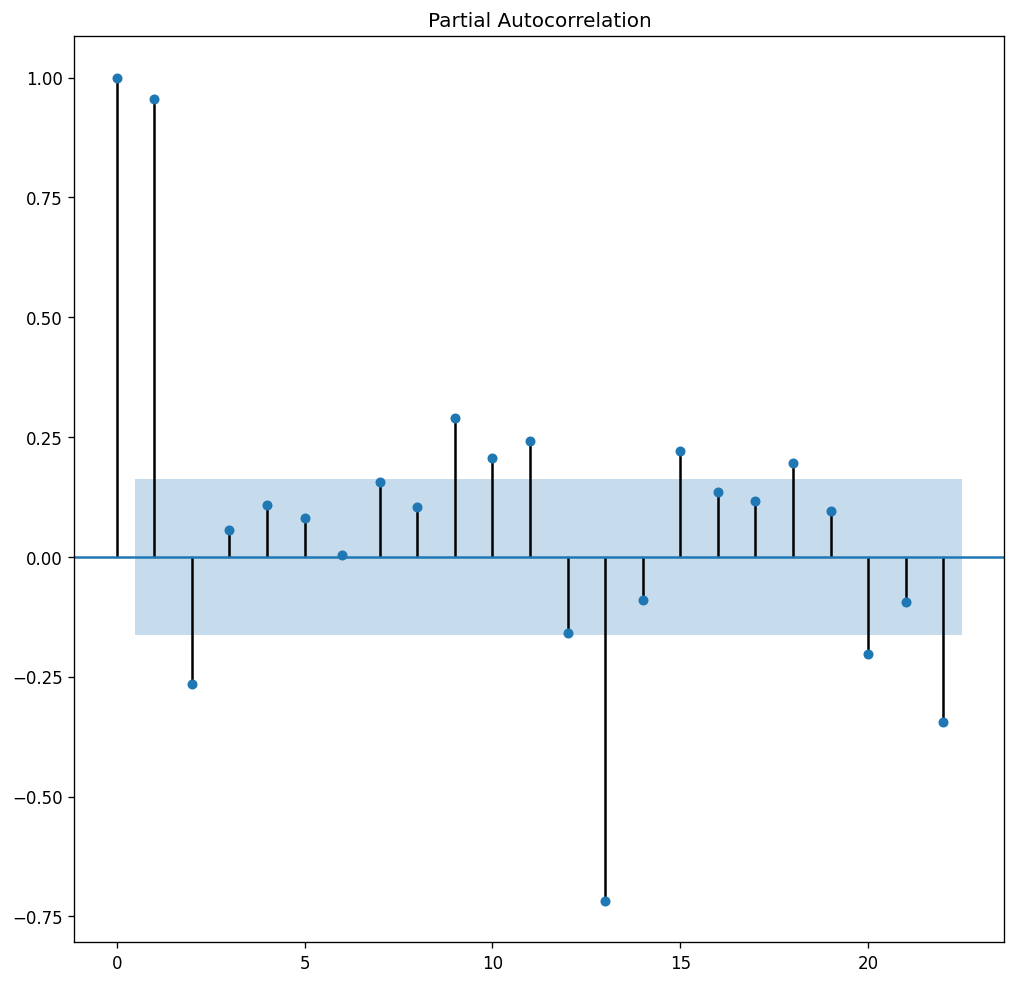

In [26]:
pacf_plot = plot_pacf(passenger_df.passengers)

### How to detrend a time series?

1.  Subtract the trend component obtained from time series decomposition we saw earlier.

2.  Subtract the mean

3.  Subtract the line of best fit from the time series. 

4.  Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.





Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

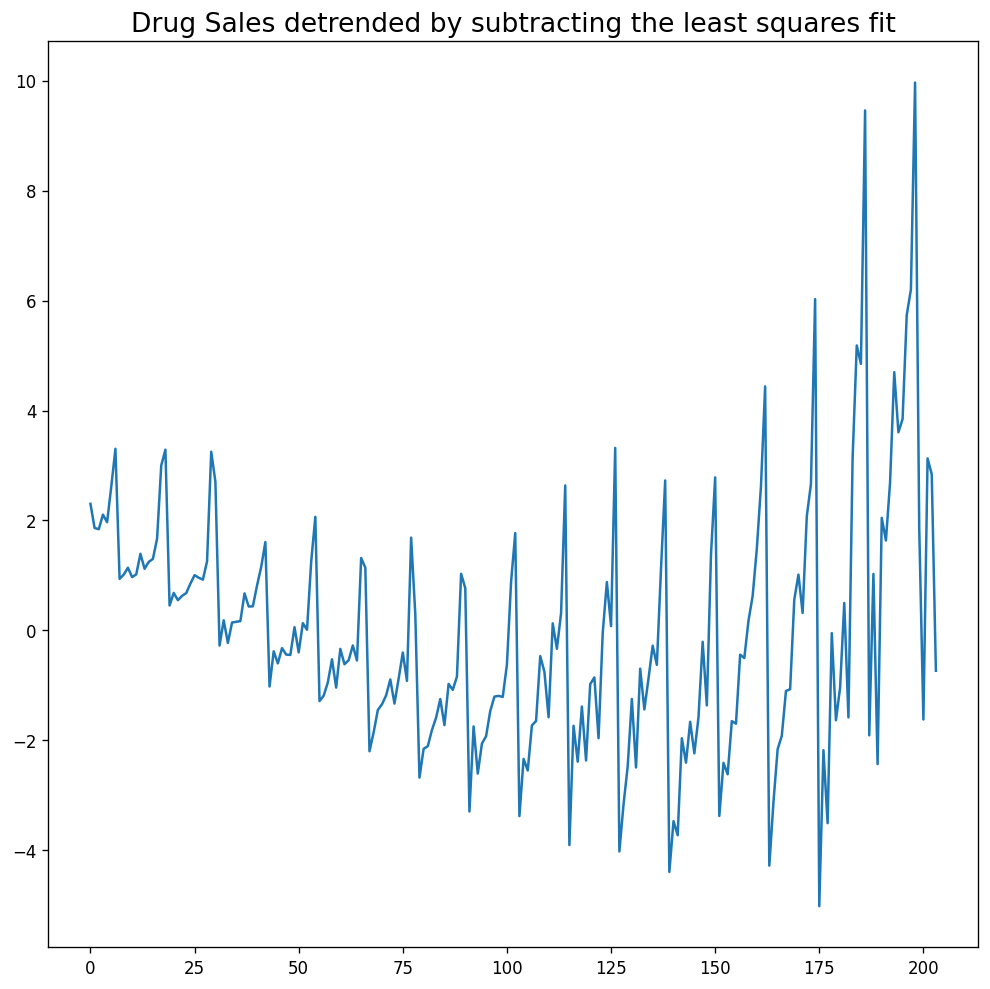

In [27]:
from scipy import signal

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)


### How to deseasonalize a time series?

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process. (Smoothening discussed in the later section)

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from STL decomposition

[]

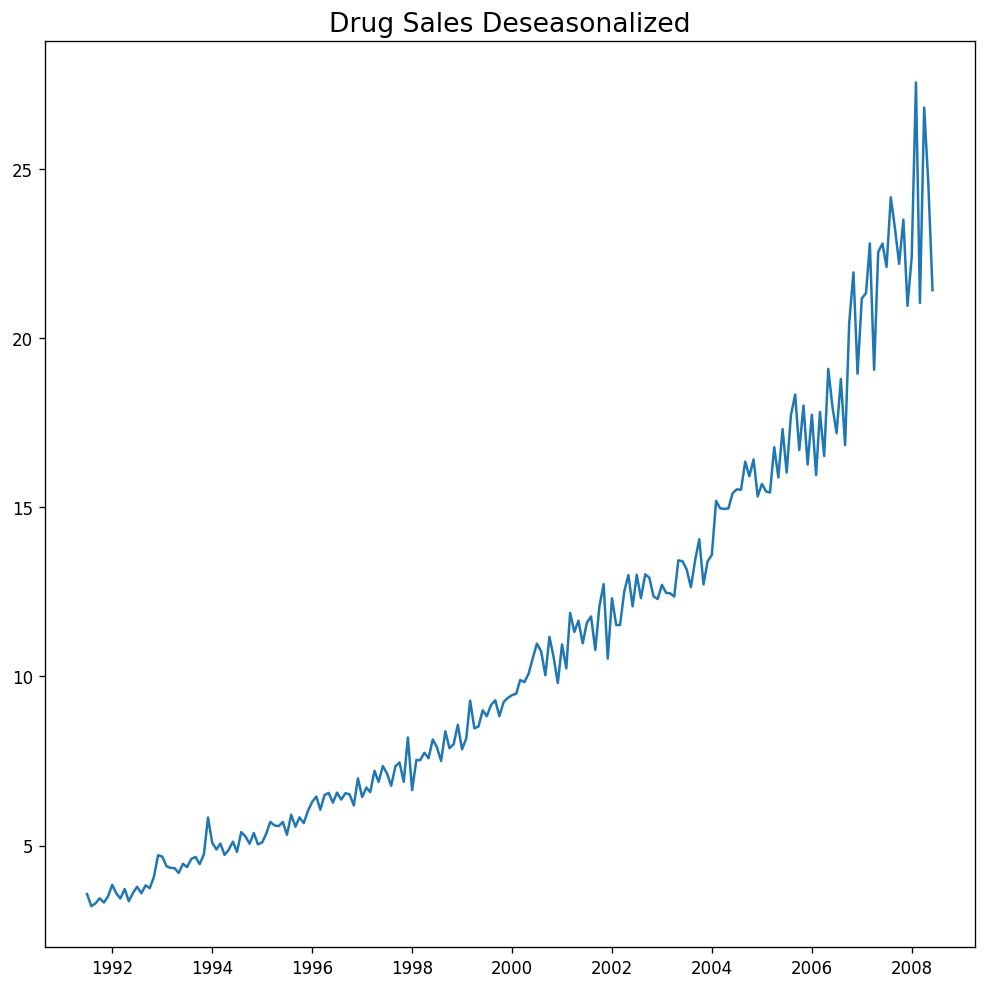

In [28]:

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

# pacf_plot = plot_pacf(df,lags=50)

### Smoothening a time series
Smoothening helps in

*   Reducing the effect of noise in a signal
*   Visualizing the trend 

### How to Smoothen Data Series?


*   Moving Averages (Rolling Mean)
*   Weighted average
*   Exponential Smoothing
*   LOESS smoothing (Localized Regression)



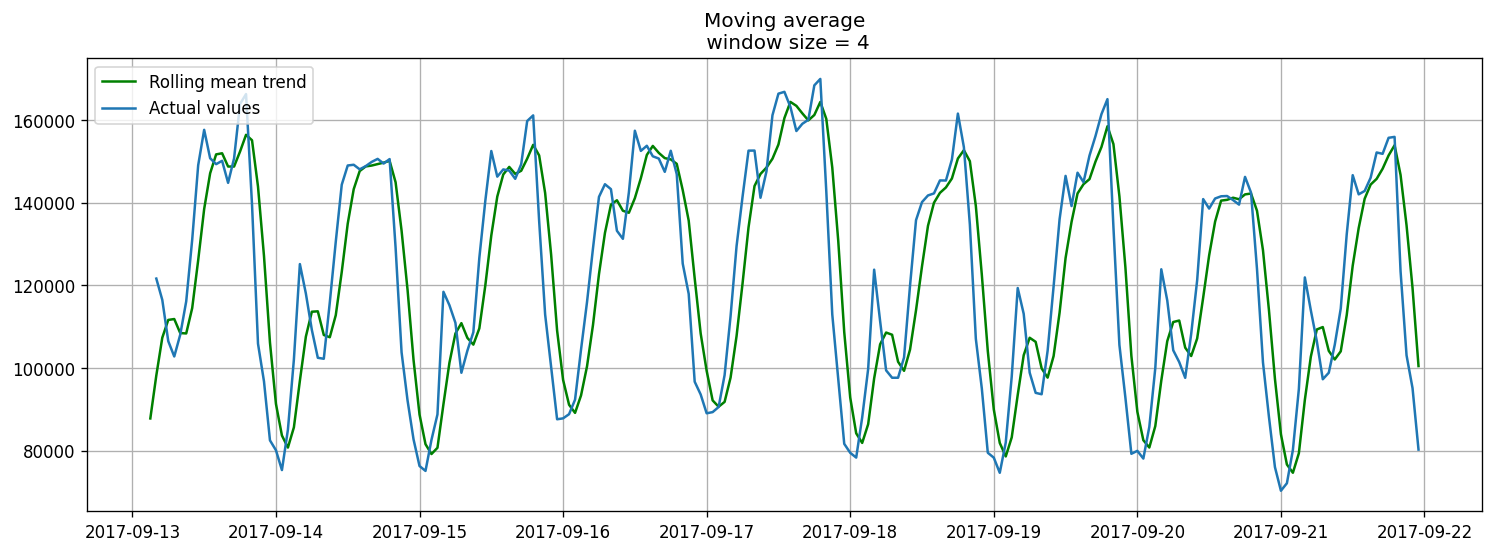

In [29]:
def plotMovingAverage(series, window):
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

plotMovingAverage(ads,4)

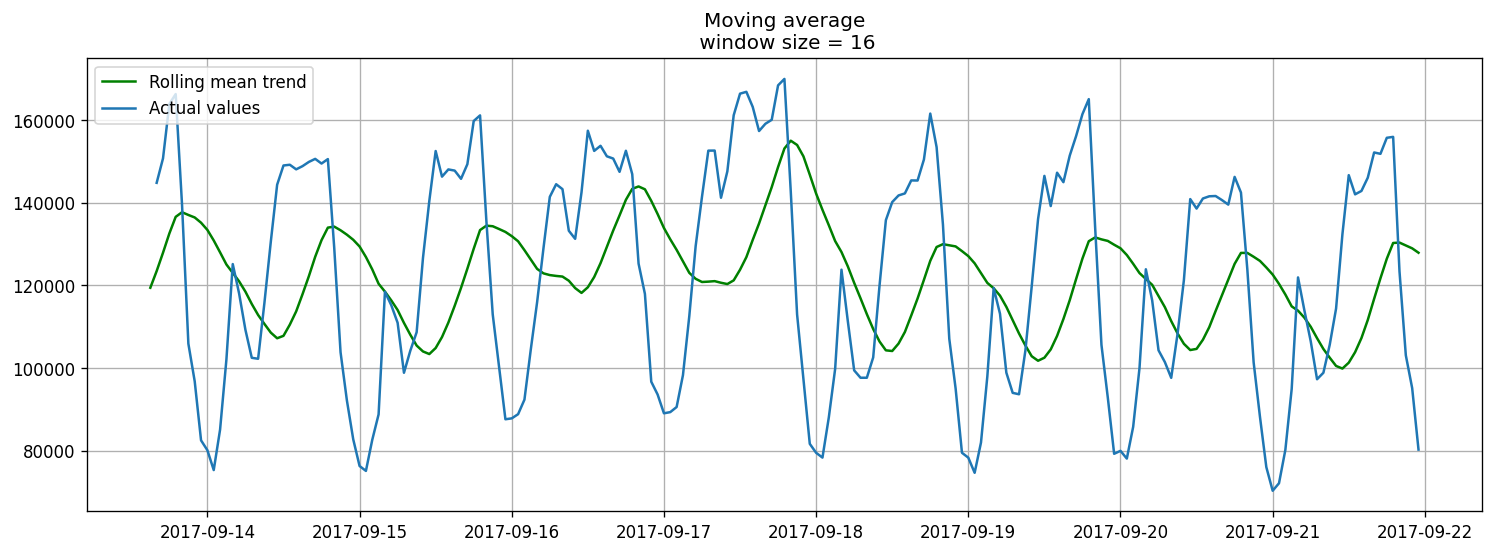

In [30]:
plotMovingAverage(ads,16)

Exponential Smoothening


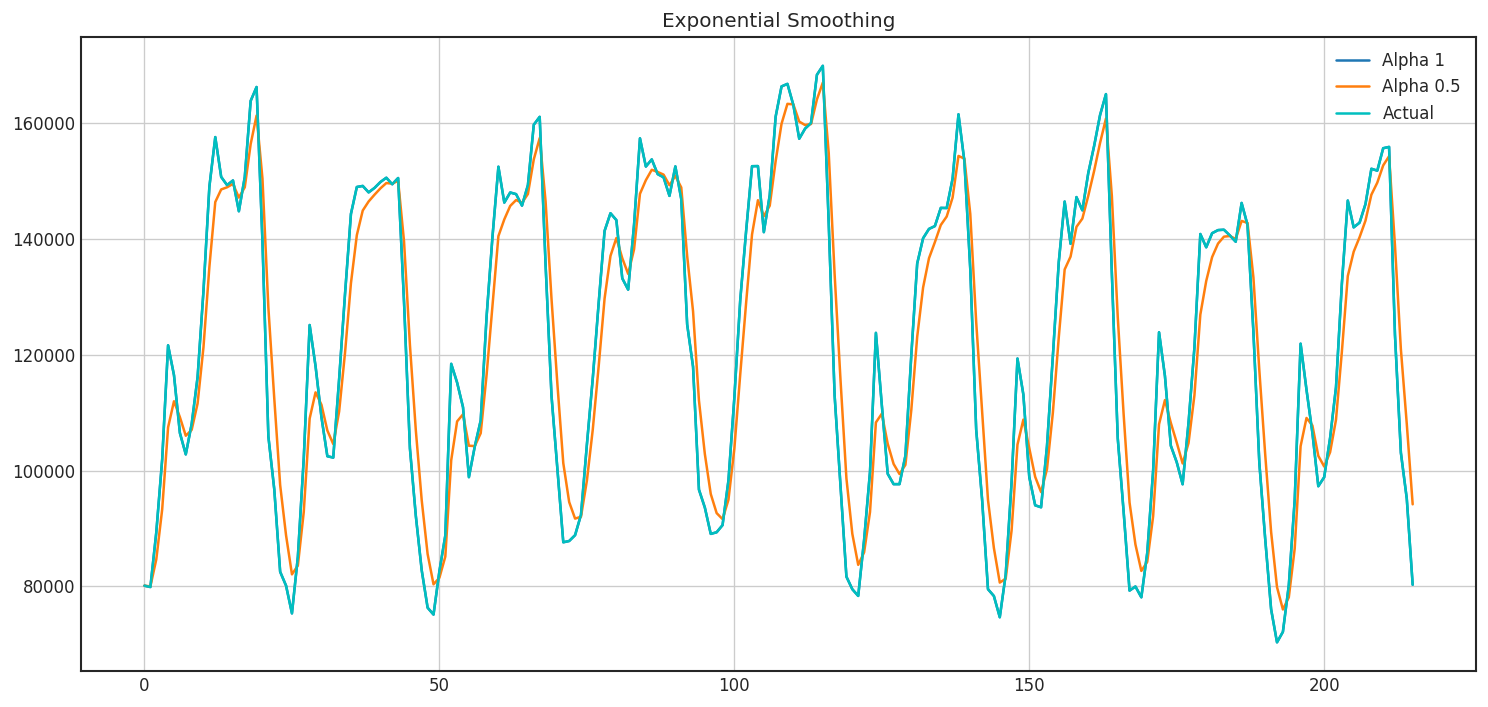

In [31]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True)

plotExponentialSmoothing(ads.Ads,[1,0.5])

# References:
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.youtube.com/watch?v=ZoJ2OctrFLA&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3

https://www.youtube.com/watch?v=FsroWpkUuYI&list=PLjwX9KFWtvNnOc4HtsvaDf1XYG3O5bv5s

https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7
